#### Why this analysis?

`Some recently watched short documentaries/interviews on human trafficking rackets in India blew my mind off 🤯. So, I felt like checking out what the national records have to say about this issue.  
I have compiled this dataset from the National Crime Records Bureau, India and also performed an analysis on the same.  
Here is my report.`

I have mentioned short description about few terms present in the dataset. For further reading, you may refer [this site](https://www.lawteacher.net/free-law-essays/administrative-law/concept-of-a-police-report-administrative-law-essay.php#:~:text=When%20the%20charge%20sheet%20is,Police%20after%20the%20investigation%20process.). 

1. **Charge Sheet-** is the complaint of a private individual on which criminal proceedings are initiated. When the charge sheet is sent by police to Magistrate, the preliminary stage of investigation and preparation is over.
2. **Final report-** The charge sheet is followed by the Final Report. It records the conclusion arrived at by the Police after the investigation process.  

***So, if Final Report column contains 0, it implies that the investigation is not yet complete.***
    
 


#### About the dataset:
The data contains number of cases of human trafficking recorded in 2018, 2019 and 2020, in India.  
Detailed description of the dataset can be found on the [dataset page](https://www.kaggle.com/datasets/cshefali/human-trafficking-in-india-2018-2020).

In [1]:
#Load all the relevant packages.
library(tidyverse) # metapackage of all tidyverse packages
library(janitor) #for data cleaning.
library(ggplot2) #for data viz
library(readxl) #this package is not part of core tidyverse, so explicitly loaded. The files are in .xlsx format.
library(RColorBrewer) #for enhanced Viz
library(treemapify) #for making treemaps with ggplot2 package.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
#Reading all the data files.
#2018
states_data_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_states_data.xlsx")
victims_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_victims_trafficked.xlsx")
rescued_victims_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_victims_rescued.xlsx")
victims_nationality_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_rescued_victims_nationality.xlsx")
culprit_disposal_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_culprits_disposal.xlsx")
cases_disposal_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_police_and_court_disposal_of_cases.xlsx")
purpose_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_human_trafficking_purpose.xlsx")

#2019
states_data_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_states_data.xlsx")
victims_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_victims_trafficked.xlsx")
rescued_victims_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_victims_rescued.xlsx")
victims_nationality_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_victims_rescued_nationality.xlsx")
culprit_disposal_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_culprits_disposal.xlsx")
cases_disposal_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_police_and_court_disposal.xlsx")
purpose_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_trafficking_purpose.xlsx")

#2020
states_data_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_states_data.xlsx")
victims_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_victims_trafficked.xlsx")
rescued_victims_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_victims_rescued.xlsx")
victims_nationality_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_rescued_victims_nationality.xlsx")
culprit_disposal_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_culprits_disposal.xlsx")
cases_disposal_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_case_disposal.xlsx")
purpose_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_trafficking_purpose.xlsx")
aht_units_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_number_of_AHT_Units.xlsx")

In [3]:
head(states_data_18)

S. No.,State/UT,Cases Reported,Percentage Share of State (2018),Mid-Year Projected Population (In Lakhs)+,Rate of Cognizable Crimes (IPC)++,region type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Andhra Pradesh,240,9.7,520.3,0.5,state
2,Arunachal Pradesh,3,0.1,14.9,0.2,state
3,Assam,262,10.6,340.4,0.8,state
4,Bihar,127,5.2,1183.3,0.1,state
5,Chhattisgarh,51,2.1,284.7,0.2,state
6,Goa,55,2.2,15.3,3.6,state


### I. Data Cleaning:
Following are the steps I took for cleaning this data.
##### 1. Cleaned column names.
##### 2. Checked for Missing values.
##### 3. Checked for Duplicate rows.
##### 4. Renamed column common in all files to one name, for uniformity.
##### 5. Removed symbols like '+', '\*' from cell values with numeric data.
##### 6. Inconsistent Data Type of Columns.
##### 6. Joining 2 dataframes into 1

#### I.1 Cleaning column names
The following code cleans all the dataframes simultaneously. Some of the components are explained as follows:
1. **c()**- combine function combines all the dataframe names into a vector.
2. Inside the loop:
    * **i**- contains name of 1st df in 1st iteration, 2nd df in 2nd iteration & so on...
    * **assign()**- used to assign the 2nd parameter to 1st parameter.
        * Syntax- assign(variable, value)
        *  Here, first clean_names() is applied to the df & the result is stored in i.
    * **clean_names()**- this function cleans all the column headers in a file, removing:
        * white spaces, brackets and other symbols.
        * converts everything to lowercase.
        * formats the name of column in snake case, e.g. name_of_person.
    * **get(i)**- 
        * takes in the name of one dataframe stored in i.
        * returns the value present in this dataframe.
        * clean_names(get(i))- the column headers of this df get cleaned by clean_names().

In [4]:
#cleaning the column headers of all files simultaneously.
#All spaces, symbols, brackets, upper case is removed 
#and column headers are formatted to snake case.
dataframe_names <- c("states_data_18","victims_18","rescued_victims_18","victims_nationality_18",
                    "culprit_disposal_18","cases_disposal_18","purpose_18","states_data_19","victims_19","rescued_victims_19","victims_nationality_19",
                    "culprit_disposal_19","cases_disposal_19","purpose_19","states_data_20","victims_20","rescued_victims_20","victims_nationality_20",
                    "culprit_disposal_20","cases_disposal_20","purpose_20","aht_units_20")
for (i in dataframe_names)
    {assign(i,janitor::clean_names(get(i)))
    }

In [5]:
#a quick look at cleaned column headers
head(states_data_18,3)

s_no,state_ut,cases_reported,percentage_share_of_state_2018,mid_year_projected_population_in_lakhs,rate_of_cognizable_crimes_ipc,region_type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Andhra Pradesh,240,9.7,520.3,0.5,state
2,Arunachal Pradesh,3,0.1,14.9,0.2,state
3,Assam,262,10.6,340.4,0.8,state


#### I.2 Missing Values & Duplicate Rows

Following code creates a dataframe with 3 columns:  
* **column 1- name of sheet**
* **column 2- number of missing values in each sheet**
* **column 3- number of duplicate rows in each sheet**  
I tried analysing NA values and duplicate rows in this manner because individual analysis of 22 files would have been time-consuming.  
And this table highlights the sheets containing such values.

I wanted to see how many missing values & duplicated rows are present in each of the 22 files. So, instead of chekcing them one by one, I did the following:
1. Created an empty dataframe with 3 columns- sheet name, total_na_values, total_duplicated_rows.
    1. sheet_name- this column contains names of all 22 files.
    2. total_na_values- contains total number of missing values in each file.
    3. total_duplicated_rows- contains total number of duplicate rows found in each file.
2. Ran a loop over **`dataframes_names`** which contains names of all sheets.
    1. each iteration works on one file and adds a row to the df_summary dataframe.
    2. **rbind()**- appends rows to a dataframe.
3. **NOTE:**
    1. `colnames(df_summary) <- columns` sets the name of the columns to the ones specified in `columns`. 
    2. ***Why have I written it at the end of this code snippet and not while creating the empty dataframe?***  
        That's because when an empty dataframe is passed to rbind function (in the 1st iteration), rbind overides the empty df and stores the results which changes the column names. So, when I was creating this df, the column names were constantly updating to something else. Hence, i wrote this line of code at the end in order to get the column headers as you are able to see now.
    

In [6]:
columns <- c("sheet_name","total_na_values","total_duplicate_values")
df_summary <- data.frame(matrix(nrow=0,ncol=length(columns)))#creating an empty dataframe.
for (i in dataframe_names){
    new_row <- c(i,sum(is.na(get(i))),sum(duplicated(get(i))))
    df_summary <- df_summary %>% rbind(new_row)
}
colnames(df_summary) <- columns

In [7]:
df_summary

sheet_name,total_na_values,total_duplicate_values
<chr>,<chr>,<chr>
states_data_18,0,0
victims_18,0,0
rescued_victims_18,0,0
victims_nationality_18,0,0
culprit_disposal_18,0,0
cases_disposal_18,13,0
purpose_18,0,0
states_data_19,0,0
victims_19,0,0


From the summary table, it is clear that missing values are present in 4 files:
1. cases_disposal_18
2. cases_disposal_19
3. cases_disposal_20  
4. states_data_20  
And no duplicate rows were found in any of the files.


##### Observations about the Missing Values:
1. **case_disposal files-** Data is missing in columns **`chargesheeted_rate`**, **`cases_conviction_rate`**.  
    * **chargesheeted rate=** (cases_chargesheeted/(cases_chargesheeted + final report))* 100.  This column depends on chargesheeted columns. So, if no. of cases chargesheeted is 0, the chargesheet rate becomes NA.
    If the rate is NA, it means that:  
        * either no trafficking cases were reported OR
        * no chargesheet was filed for reported cases.
    * **case conviction rate=** (cases convicted by court/cases with complete trials)* 100. If cases with complete trials is 0 or cases convicted is 0, this value is NA.  
    
2. **states_data_20 file**-  
    * The column **`chargesheeting rate`** contains most of the NA values. I won't be using this column & it is not present in the **states_data** file of 2018, 2019.
    * NA values are also present in the Ladhak row. 
        * That's because the earlier state of Jammu and Kashmir was converted to 2 Union Territories: **Jammu & Kashmir** & **Ladhak**. 
        * So, in this file as per desciption on website data, the combined data of Jammu & Kashmir and Ladhak are present in the Jammu & Kashmir row.  
        Hence, these NA values can be ignored.

##### Removing some columns
The following code removes: 
* **`s_no`** column from **states_data_18** file. 
* **`chargesheeting_rate`** column from **states_data_20** file.  

These columns are not required in this analysis and no other files for other years have these columns.

In [8]:
#removing the s_no column & chargesheeting_rate from states_data_18 to bring uniformity. 
#None of the other files have this col.
states_data_18 <- states_data_18 %>% select(-s_no)
#removing chargesheeting_rate column from states_data_20 file.
states_data_20 <- states_data_20 %>% select(-chargesheeting_rate)

#### I.3 Renaming columns common to all file, for uniformity.
In some files, 1st column is **`states`** and other files have 1st column as **`states_ut`**.  
This column gives the names of all states and union territories in India.  
Hence, the following code renames this column of all the files as **`states_ut`** to bring uniformity.

In [9]:
#renaming the column names of all 22 files to bring uniformity
for (i in dataframe_names) {
    assign(i,rename(get(i),states_ut=colnames(get(i))[1]))
}

In [10]:
colnames(cases_disposal_20)

[1] "states_ut"                           
 [2] "total_number_of_cases"               
 [3] "cases_chargesheeted_by_police"       
 [4] "cases_with_final_reports_by_police"  
 [5] "chargesheeting_rate"                 
 [6] "cases_convicted_by_court"            
 [7] "cases_acquitted_discharged_by_court" 
 [8] "cases_in_which_trails_were_completed"
 [9] "cases_conviction_rate"               
[10] "region_type"

In [11]:
#simplifying some column names
#file- states_data_18
states_data_18 <- states_data_18 %>%
                    rename(percent_share_of_state = percentage_share_of_state_2018,
                          projected_population_18 = mid_year_projected_population_in_lakhs,
                          cognizable_crime_rate = rate_of_cognizable_crimes_ipc)

#file- states_data_19
states_data_19 <- states_data_19 %>%
                    rename(projected_population_19 = mid_year_projected_population_in_lakhs)
#file- states_data_20
states_data_20 <- states_data_20 %>%
                    rename(projected_population_20 = mid_year_projected_population_in_lakhs,
                          cognizable_crime_rate = rate_of_cognizable_crimes_ipc)
#file- culprits disposal 
culprit_disposal_18 <- culprit_disposal_18 %>%
                        rename(persons_acquitted_by_court = persons_acquitted_discharged_by_the_court)
culprit_disposal_19 <- culprit_disposal_19 %>%
                        rename(persons_acquitted_by_court = persons_acquitted_discharged_by_the_court)
culprit_disposal_20 <- culprit_disposal_20 %>%
                        rename(persons_acquitted_by_court = persons_acquitted_discharged_by_the_court)
#file- cases disposal
cases_disposal_18 <- cases_disposal_18 %>%
                        rename(total_cases_18 = total_number_of_cases,
                               cases_chargesheeted = cases_chargesheeted_by_police,
                               cases_with_final_reports = cases_with_final_reports_by_police,
                              cases_acquitted_by_court = cases_acquitted_discharged_by_court,
                              cases_with_complete_trials = cases_in_which_trails_were_completed)
cases_disposal_19 <- cases_disposal_19 %>%
                        rename(total_cases_19 = total_number_of_cases,
                               cases_chargesheeted = cases_chargesheeted_by_police,
                               cases_with_final_reports = cases_with_final_reports_by_police,
                              cases_acquitted_by_court = cases_acquitted_discharged_by_court,
                              cases_with_complete_trials = cases_in_which_trails_were_completed)
cases_disposal_20 <- cases_disposal_20 %>%
                        rename(total_cases_20 = total_number_of_cases,
                               cases_chargesheeted = cases_chargesheeted_by_police,
                               cases_with_final_reports = cases_with_final_reports_by_police,
                              cases_acquitted_by_court = cases_acquitted_discharged_by_court,
                              cases_with_complete_trials = cases_in_which_trails_were_completed)

#file- purpose
purpose_18 <- purpose_18 %>%
                rename(prostitution = sexual_exploitation_for_prostitution)
purpose_19 <- purpose_19 %>%
                rename(prostitution = sexual_exploitation_for_prostitution)
purpose_20 <- purpose_20 %>%
                rename(prostitution = sexual_exploitation_for_prostitution)

#### 3. Inconsistent Data Type of Columns

I checked the data type of columns in each file using **str()** and **glimpse()**.  
And the following issues were observed:  
1. **states_data_20**- 2 columns,`total_cases_2018`, `total_cases_2019` are character type instead of numeric.
2. **victims_nationality_18**- `male`,`female`,`total_rescued` are character type instead of numeric.

In [12]:
str(states_data_20)
str(victims_nationality_18)

tibble [36 × 7] (S3: tbl_df/tbl/data.frame)
 $ states_ut              : chr [1:36] "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ total_cases_2018       : chr [1:36] "240" "3" "308" "127" ...
 $ total_cases_2019       : chr [1:36] "245" "0" "201" "106" ...
 $ total_cases_2020       : num [1:36] 171 2 124 75 38 17 13 14 4 140 ...
 $ projected_population_20: num [1:36] 526 15.2 347.9 1219 292.4 ...
 $ cognizable_crime_rate  : num [1:36] 0.3251 0.1314 0.3564 0.0615 0.13 ...
 $ region_type            : chr [1:36] "state" "state" "state" "state" ...
tibble [144 × 6] (S3: tbl_df/tbl/data.frame)
 $ states_ut            : chr [1:144] "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ male                 : chr [1:144] "1" "4" "29" "466" ...
 $ female               : chr [1:144] "452" "0" "237" "80" ...
 $ total_victims_rescued: chr [1:144] "453" "4" "266" "546" ...
 $ nationality          : chr [1:144] "India" "India" "India" "India" ...
 $ region_type          : chr [1:1

Few other observations in the data:
1. In some dataframes, the **`state_ut`** column contains '@', '+','\*' and other such symbols alongside the names of states and Union Territories. These symbols have to be omitted. e.g. **"Bihar\@"**
2. Some columns with numeric data contain symbols like '+','\*','++' etc. These symbols need to be omitted. e.g. **"24\+"**, **"7\*"**
3. **An Important Observation:**
    * In the dataframe `states_data_20`, 2 columns`total_cases_2018`, `total_cases_2019` are character type instead of numeric. 
    * And some values in these columns have a '+' sign, for e.g. total_cases_2019 for one state is "54+".
    * So, before converting these cols from character to numeric type, these symbols need to be removed. Otherwise the `as.numeric()` function will convert these cell values to NA. 
    * ***Hence, I have first removed all such symbols in the files and then converted the data type of inconsistent columns to numeric***.

In [13]:
#removing symbols from states_data_20 dataframe
states_data_20 <- states_data_20 %>%
                    mutate(states_ut = gsub("@","",states_ut),
                          total_cases_2018 = gsub("\\+","",total_cases_2018),
                          total_cases_2019 = gsub("\\+","",total_cases_2019))



In [14]:
#changing the data type of inconsistent columns from character to numeric
states_data_20 <- states_data_20 %>%
                    mutate(total_cases_2018 = as.numeric(total_cases_2018),
                           total_cases_2019 = as.numeric(total_cases_2019))


In [15]:
victims_nationality_18 <- victims_nationality_18 %>%
                    mutate(male = as.numeric(male),
                          female = as.numeric(female),
                          total_victims_rescued = as.numeric(total_victims_rescued))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


#### II. Analysis

In [16]:
head(states_data_18)

states_ut,cases_reported,percent_share_of_state,projected_population_18,cognizable_crime_rate,region_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Andhra Pradesh,240,9.7,520.3,0.5,state
Arunachal Pradesh,3,0.1,14.9,0.2,state
Assam,262,10.6,340.4,0.8,state
Bihar,127,5.2,1183.3,0.1,state
Chhattisgarh,51,2.1,284.7,0.2,state
Goa,55,2.2,15.3,3.6,state


##### Setting the Plot Size in Kaggle:
* The plot size in Kaggle messes up sometimes, especially while displaying multiple plots in 1 frame. (e.g. when using **`~facet_wrap()`** in R).  
* So, the following function takes 2 arguments as plot height and plot width and sets the plot size as per user's requirements.  
* It will be called before every visualization.

In [17]:
kaggle_plotsize <- function(width, height) {
                    options(repr.plot.width = width, repr.plot.height = height)
                    }

#### Q1. What was the total number of trafficking cases reported in each Indian state in 2018?

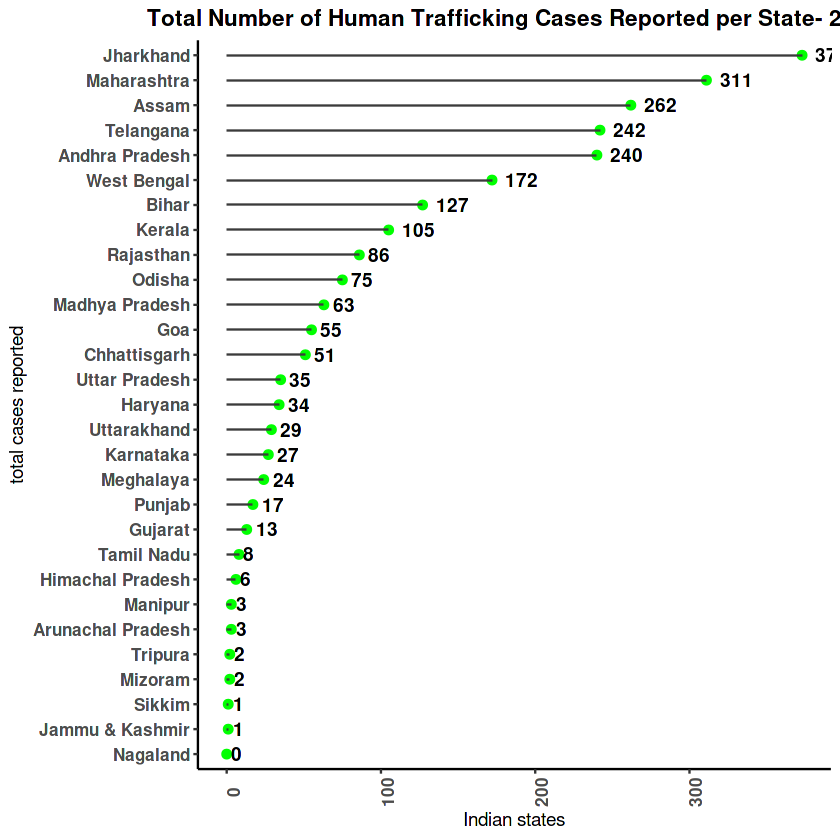

In [18]:
states_data_18 %>%
filter(region_type=="state") %>%
ggplot(aes(x=reorder(states_ut,cases_reported),y=cases_reported)) +
geom_point(size=2,color="green") +
geom_segment(aes(x=states_ut,xend=states_ut,y=0,yend=cases_reported),color="grey23") +
geom_text(aes(label=cases_reported),color="black",stat="identity",hjust=-0.4,fontface="bold") +
theme_classic() +
labs(x="total cases reported", y="Indian states",
     title="Total Number of Human Trafficking Cases Reported per State- 2018") +
theme(axis.text = element_text(face="bold",size=10),legend.position="none",
     plot.title=element_text(face="bold",hjust=0.5),axis.text.x=element_text(angle=90)) +
coord_flip()

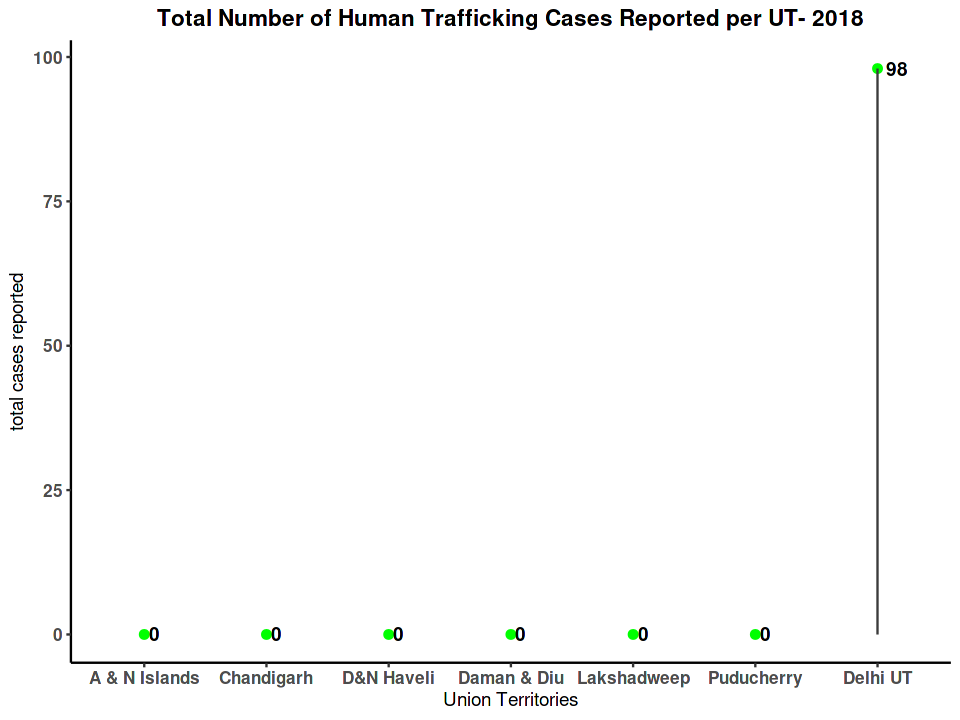

In [19]:
#total cases reported per Union Territory in 2018
kaggle_plotsize(8,6)
states_data_18 %>% 
filter(region_type=="union territory") %>%
ggplot(aes(x=reorder(states_ut,cases_reported),y=cases_reported,fill=states_ut)) +
geom_point(size=2,color="green") +
geom_segment(aes(x=states_ut,xend=states_ut,y=0,yend=cases_reported),color="grey23") +
geom_text(aes(label=cases_reported),color="black",stat="identity",hjust=-0.4,fontface="bold") +
theme_classic() +
theme(axis.text = element_text(face="bold",size=10),legend.position="none",
     plot.title=element_text(face="bold",hjust=0.5)) +
labs(x="Union Territories", y="total cases reported",
     title="Total Number of Human Trafficking Cases Reported per UT- 2018")

##### Observation: 
**Delhi is the only Union Territory with cases of human trafficking.**

#### Q2. What was the % share of each state/UT in the crime numbers in 2018?

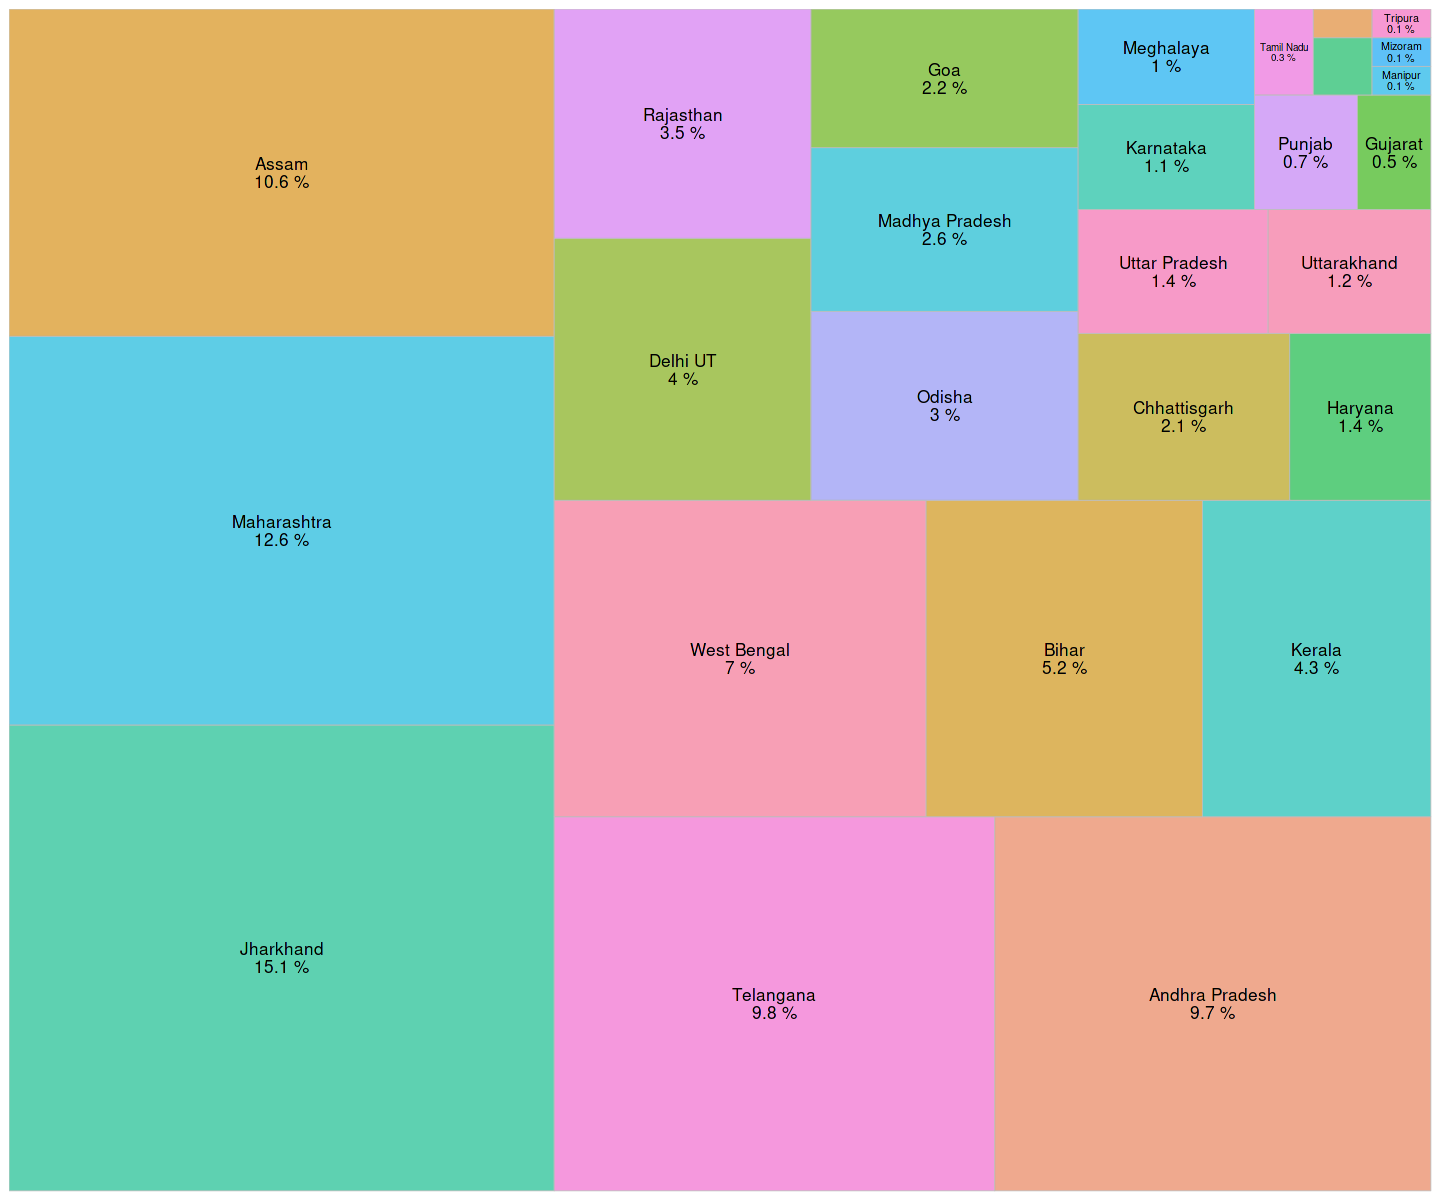

In [20]:
#percentage share of each state in the total reported cases annually
#representing through a Treemap.
kaggle_plotsize(12,10)
states_data_18 %>%
ggplot(aes(area=percent_share_of_state,fill=states_ut,
           label=paste(states_ut,paste(percent_share_of_state,"%"),sep='\n'))) +
geom_treemap(alpha=0.6) +
geom_treemap_text(color="black",place="center",size=10) +
theme(legend.position="none")



In [21]:
colnames(states_data_18)

[1] "states_ut"               "cases_reported"         
[3] "percent_share_of_state"  "projected_population_18"
[5] "cognizable_crime_rate"   "region_type"

#### Q3. Which state/union territory had the highest rate of cognizable crimes in 2018?
##### (work on this later)

#### Q4. How many of the trafficked victims were underage (below 18) ? 

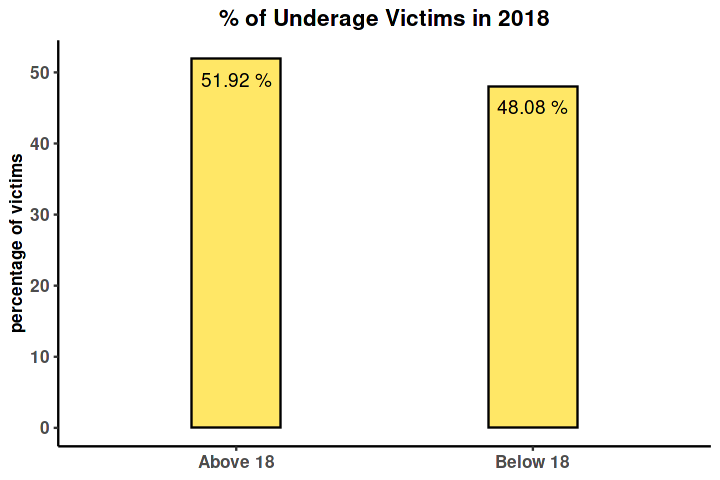

In [22]:
kaggle_plotsize(6,4)
victims_18 %>%
group_by(age_group) %>%
summarize(total_count = sum(total_victims_trafficked)) %>%
mutate(in_percent = (total_count/sum(total_count))*100) %>%
ggplot(aes(x=age_group,y=in_percent)) +
geom_bar(stat="identity",width=0.3,alpha=0.6,color="black",fill="gold") +
geom_text(aes(label=paste(round(in_percent,2),"%")),color="black",vjust=2) + 
theme_classic() +
labs(title="% of Underage Victims in 2018",y="percentage of victims") +
theme(plot.title=element_text(face="bold",hjust=0.5),
     legend.position="none",axis.text=element_text(face="bold",size=10),
     axis.title.x=element_blank(),axis.title.y=element_text(face="bold",size=10))

##### Observation: 
**Approx. 52% of the trafficked victims in 2018 were above 18 years of age.**

In [23]:
head(victims_18)

states_ut,male,female,total_victims_trafficked,age_group,region_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
A & N Islands,0,0,0,Below 18,union territory
A & N Islands,0,0,0,Above 18,union territory
Andhra Pradesh,1,15,16,Below 18,state
Andhra Pradesh,0,351,351,Above 18,state
Arunachal Pradesh,3,0,3,Below 18,state
Arunachal Pradesh,1,0,1,Above 18,state


#### Q5. How many victims are male/female?

In [24]:
#converting data to long form
victims_trafficked_long <- victims_18 %>%
            pivot_longer(cols=c("male","female"),
                        names_to="gender",
                        values_to="total_victims")
head(victims_trafficked_long)


states_ut,total_victims_trafficked,age_group,region_type,gender,total_victims
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
A & N Islands,0,Below 18,union territory,male,0
A & N Islands,0,Below 18,union territory,female,0
A & N Islands,0,Above 18,union territory,male,0
A & N Islands,0,Above 18,union territory,female,0
Andhra Pradesh,16,Below 18,state,male,1
Andhra Pradesh,16,Below 18,state,female,15


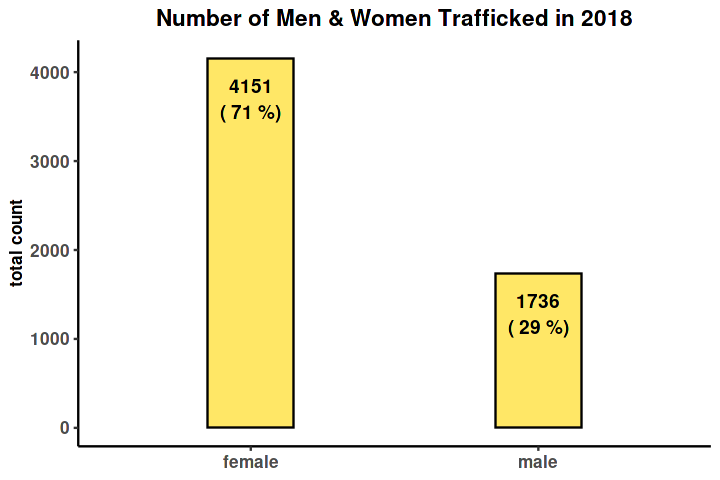

In [25]:
#number of male and female victims in 2018
kaggle_plotsize(6,4)
victims_trafficked_long %>%
group_by(gender) %>%
summarize(victims_count=sum(total_victims)) %>%
mutate(in_percent = round((victims_count/sum(victims_count))*100),2) %>%
ggplot(aes(x=gender,y=victims_count)) +
geom_bar(stat="identity",width=0.3,color="black",fill="gold",alpha=0.6) +
geom_text(aes(label=paste(victims_count,paste("(",in_percent,"%)"),sep="\n")),
          vjust=1.5,fontface="bold",color="black") +
labs(title="Number of Men & Women Trafficked in 2018",y="total count") +
theme_classic() +
theme(plot.title=element_text(face="bold",hjust=0.5),
     axis.text=element_text(face="bold",size=10),
     axis.title.x=element_blank(),axis.title.y=element_text(face="bold",size=10))

##### Observation: 
**Number of women trafficked is considerably higher- 71% than number of male victims who account for 29% of all victims.**

#### Q6. What is the number of male and female victims per state ?

`summarise()` has grouped output by 'states_ut'. You can override using the `.groups` argument.



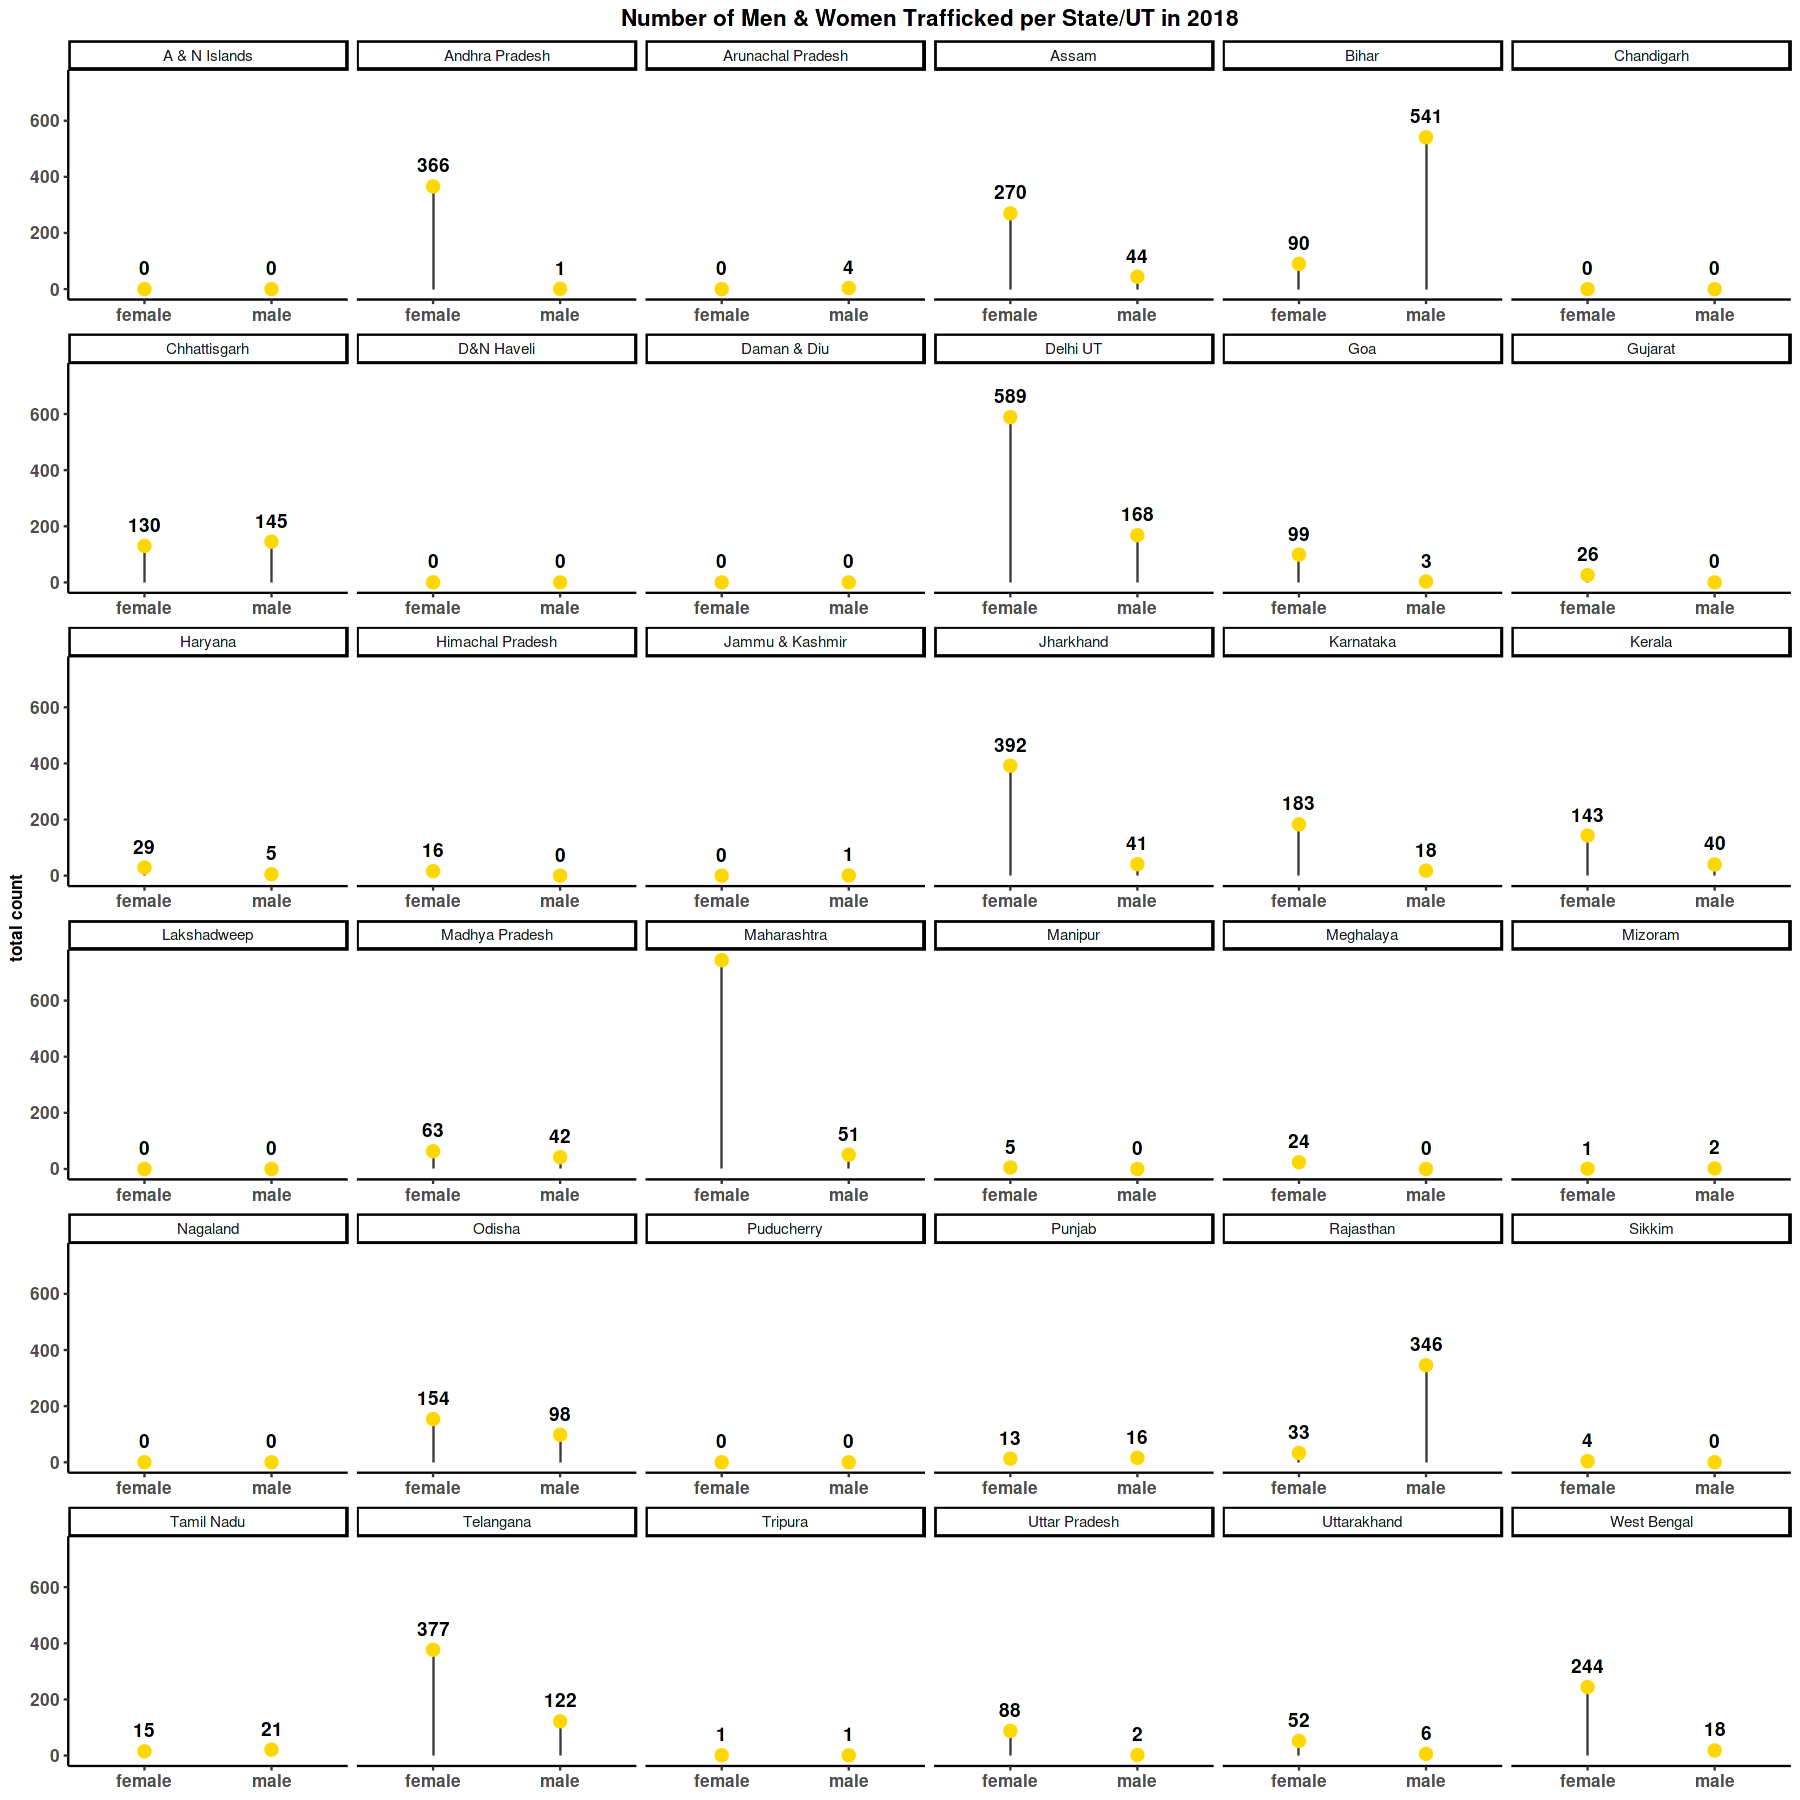

In [26]:
#number of male and female victims per state/union territory in 2018
kaggle_plotsize(15,15)
victims_trafficked_long %>%
group_by(states_ut,gender) %>%
summarize(victims_count=sum(total_victims)) %>%
ggplot(aes(x=gender,y=victims_count)) +
geom_segment(aes(x=gender,xend=gender,y=0,yend=victims_count),color="gray23") +
geom_point(size=3,color="gold") +
#geom_bar(stat="identity",width=0.3,color="black",position="dodge",fill="gold") +
geom_text(aes(label=victims_count),vjust=-1,fontface="bold",color="black") +
labs(title="Number of Men & Women Trafficked per State/UT in 2018",y="total count") +
theme_classic() +
theme(plot.title=element_text(face="bold",hjust=0.5),
     axis.text=element_text(face="bold",size=10),
     axis.title.x=element_blank(),axis.title.y=element_text(face="bold",size=10)) +
facet_wrap(~states_ut,scales="free_x")

##### Observation:
1. **Women-** Women account for majority of victims in following states:
    * Andra Pradesh
    * Assam
    * Delhi
    * Maharashtra
    * Telangana
2. **Men-** Men are targetted in trafficking rackets in the following states:
    * Bihar
    * Chattisgarh
    * Rajasthan

In [27]:
head(rescued_victims_18)

states_ut,male,female,total_victims_rescued,age_group,region_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
A & N Islands,0,0,0,Below 18,union territory
A & N Islands,0,0,0,Above 18,union territory
Andhra Pradesh,1,15,16,Below 18,state
Andhra Pradesh,0,437,437,Above 18,state
Arunachal Pradesh,3,0,3,Below 18,state
Arunachal Pradesh,1,0,1,Above 18,state


In [28]:
head(rescued_victims_18)

states_ut,male,female,total_victims_rescued,age_group,region_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
A & N Islands,0,0,0,Below 18,union territory
A & N Islands,0,0,0,Above 18,union territory
Andhra Pradesh,1,15,16,Below 18,state
Andhra Pradesh,0,437,437,Above 18,state
Arunachal Pradesh,3,0,3,Below 18,state
Arunachal Pradesh,1,0,1,Above 18,state


#### Q7. How many victims were rescued per state in 2018?

In the following code, I created a dataframe that contains total victims trafficked and rescued per state, so that both values can be displayed in the plot side by side for easy comparison/analysis.

In [29]:
#creating a df with total victims trafficked and rescued per state.
victims_data <- data.frame(states_ut = victims_18$states_ut,
                           total_trafficked = victims_18$total_victims_trafficked,
                           total_rescued = rescued_victims_18$total_victims_rescued,
                           age_group = victims_18$age_group,
                           region_type = victims_18$region_type)


In [30]:
head(victims_data)

,states_ut,total_trafficked,total_rescued,age_group,region_type
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,A & N Islands,0,0,Below 18,union territory
2,A & N Islands,0,0,Above 18,union territory
3,Andhra Pradesh,16,16,Below 18,state
4,Andhra Pradesh,351,437,Above 18,state
5,Arunachal Pradesh,3,3,Below 18,state
6,Arunachal Pradesh,1,1,Above 18,state


In [31]:
victims_data_long <- victims_data %>%
    pivot_longer(col=c(total_trafficked,total_rescued),names_to="victim_status",values_to="total_count") %>%
    group_by(states_ut,victim_status) %>%
    summarize(total_count = sum(total_count))

`summarise()` has grouped output by 'states_ut'. You can override using the `.groups` argument.



In [32]:
head(victims_data_long,6)

states_ut,victim_status,total_count
<chr>,<chr>,<dbl>
A & N Islands,total_rescued,0
A & N Islands,total_trafficked,0
Andhra Pradesh,total_rescued,453
Andhra Pradesh,total_trafficked,367
Arunachal Pradesh,total_rescued,4
Arunachal Pradesh,total_trafficked,4


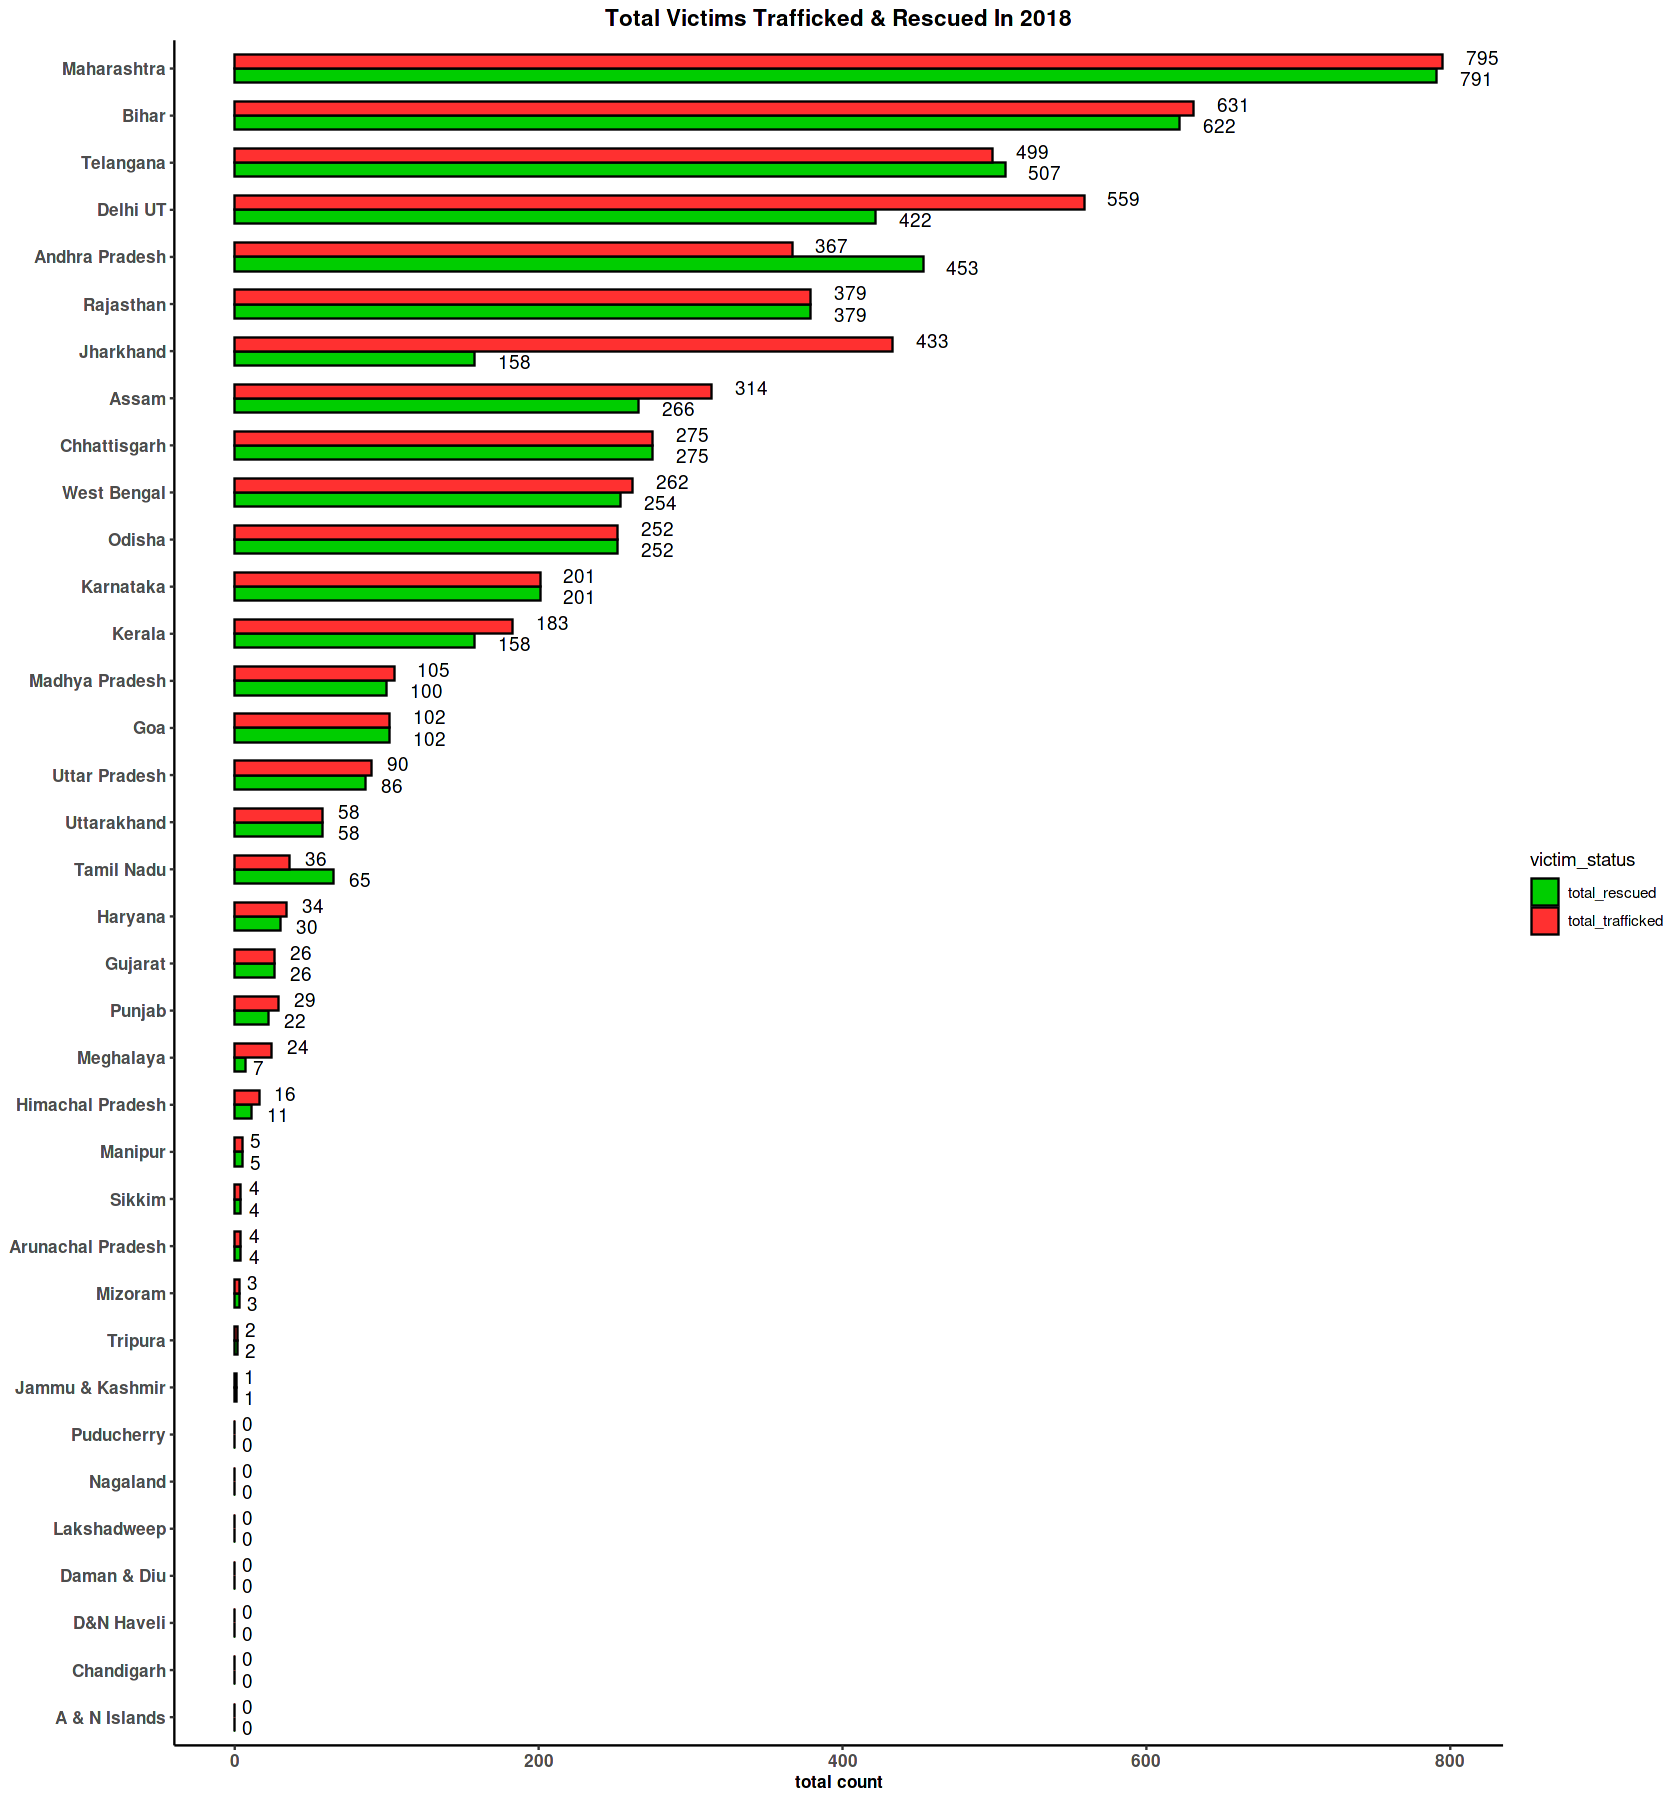

In [33]:
#representing total victims trafficked and rescued per state in 2018
kaggle_plotsize(14,15)
victims_data_long %>%
ggplot(aes(x=reorder(states_ut,total_count),y=total_count,fill=victim_status)) +
geom_bar(position="dodge",stat="identity",width=0.6,color="black") +
scale_fill_manual(values=c("green3","firebrick1")) +
geom_text(aes(label=total_count),hjust=-0.7,color="black",position=position_dodge(width=0.9)) +
labs(y="total count",title="Total Victims Trafficked & Rescued In 2018") +
theme_classic() +
coord_flip() +
theme(plot.title=element_text(hjust=0.5,face="bold"),axis.title.y=element_blank(),
     axis.text=element_text(face="bold",size=10),axis.title.x=element_text(face="bold",size=10))

#### Q8. How many underage victims were rescued out of all rescued victims?

In [34]:
head(victims_data,4)

,states_ut,total_trafficked,total_rescued,age_group,region_type
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,A & N Islands,0,0,Below 18,union territory
2,A & N Islands,0,0,Above 18,union territory
3,Andhra Pradesh,16,16,Below 18,state
4,Andhra Pradesh,351,437,Above 18,state


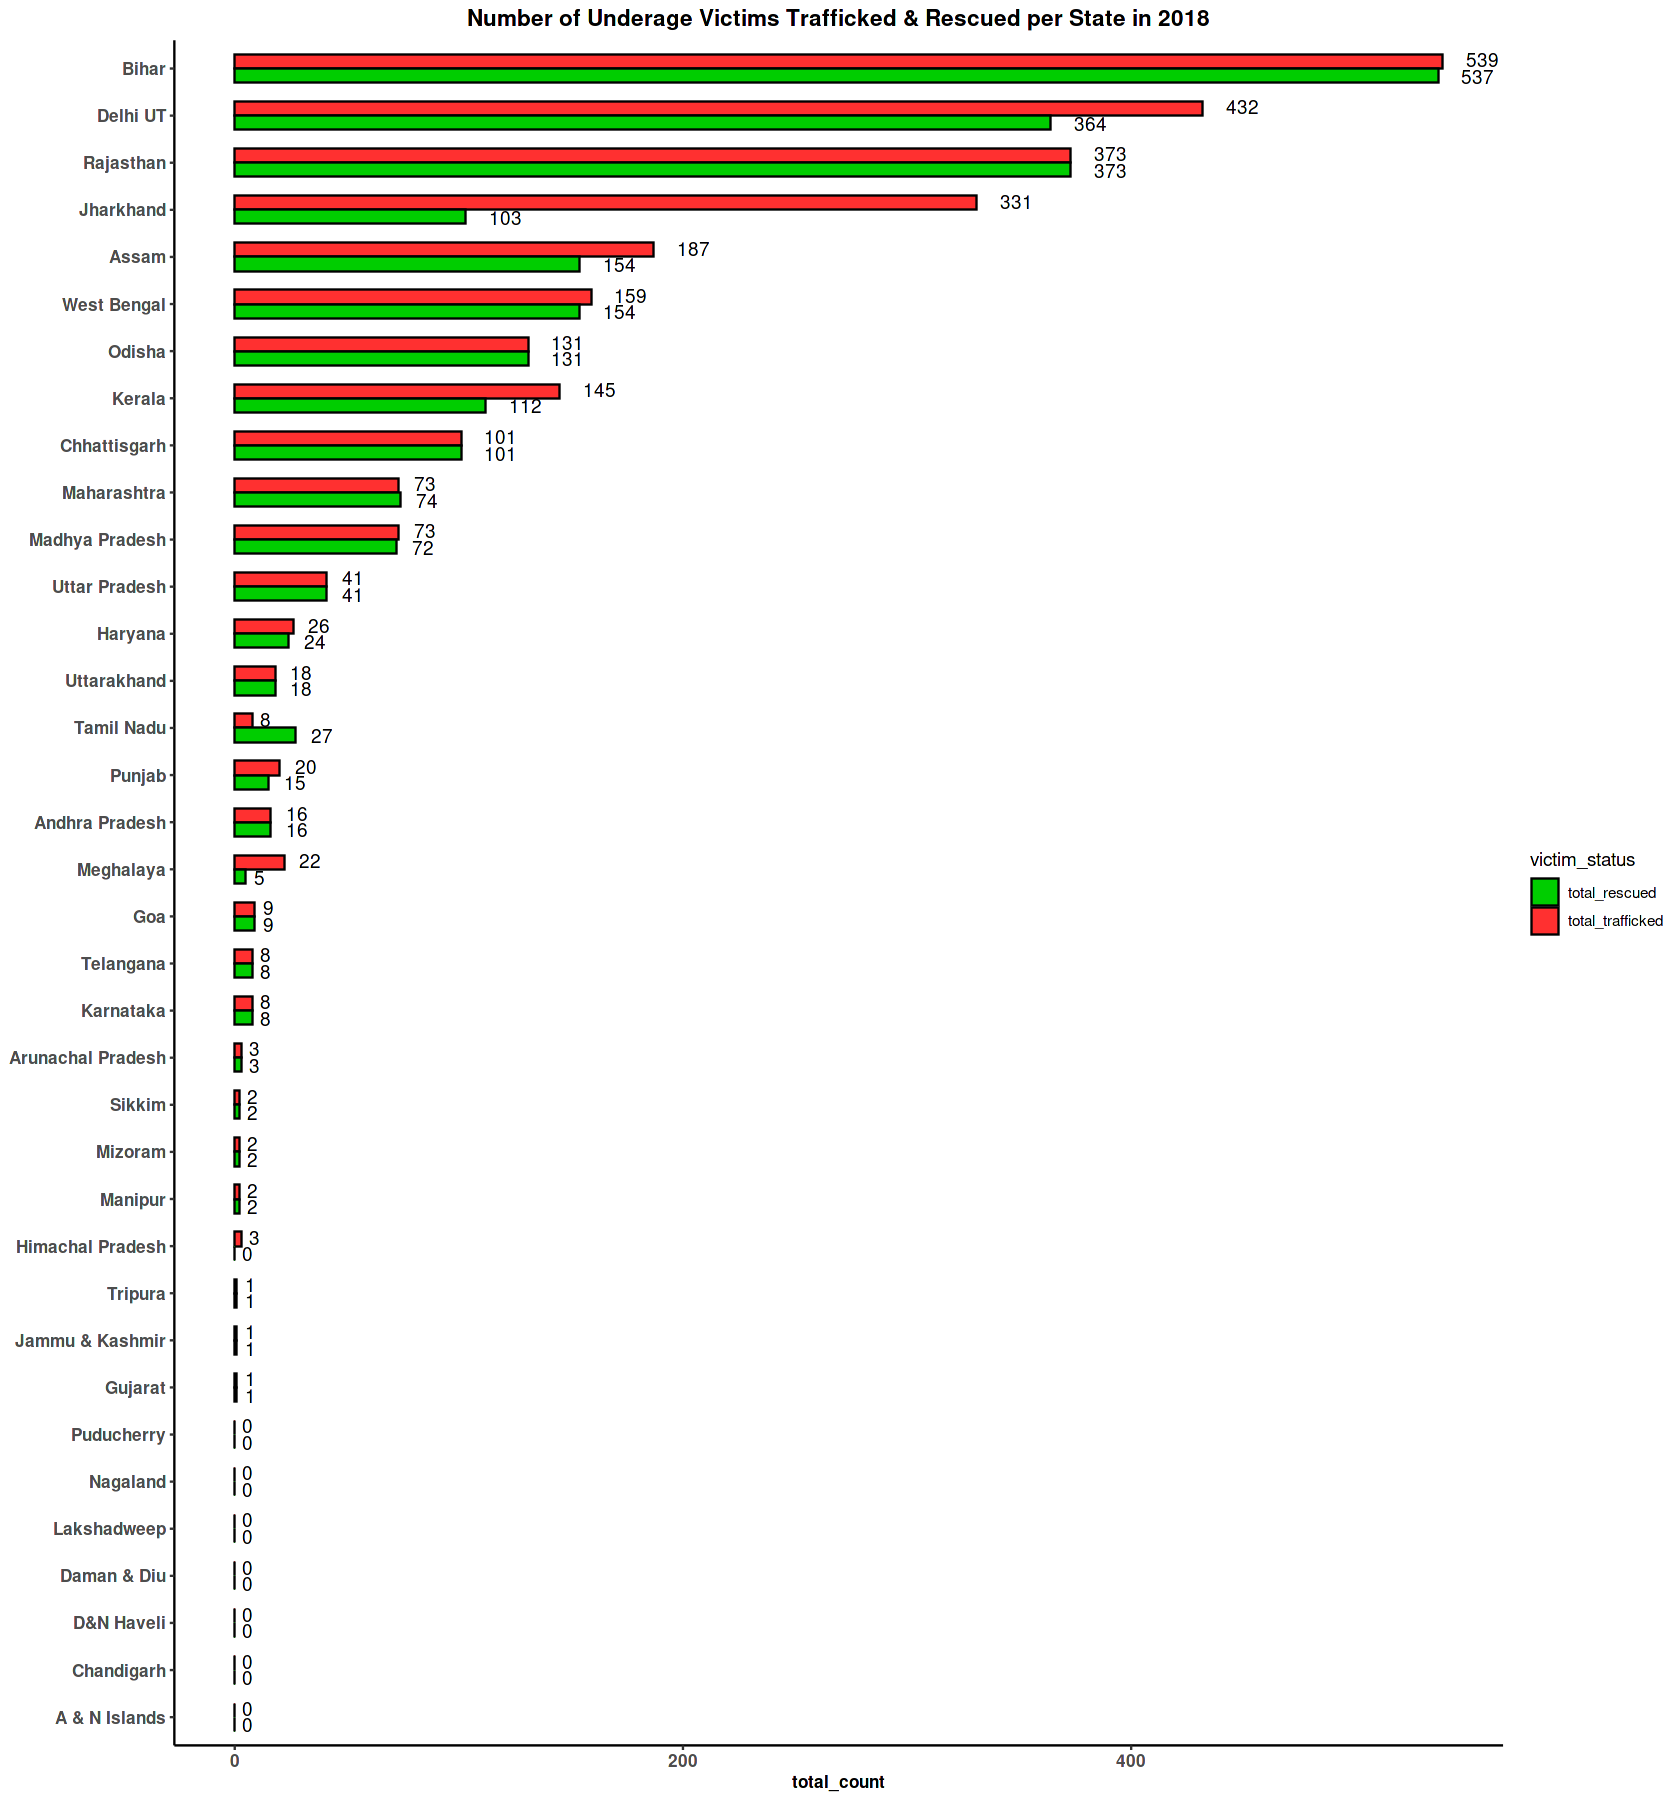

In [35]:
victims_data %>%
filter(age_group=="Below 18") %>%
pivot_longer(col=c(total_trafficked,total_rescued),names_to="victim_status",values_to="total_count") %>%
ggplot(aes(x=reorder(states_ut,total_count),y=total_count,fill=victim_status)) +
geom_bar(stat="identity",position="dodge",width=0.6,color="black") +
geom_text(aes(label=total_count),position=position_dodge(width=0.7),hjust=-0.7) +
scale_fill_manual(values=c("green3","firebrick1")) +
labs(title="Number of Underage Victims Trafficked & Rescued per State in 2018",x="total count") +
theme_classic() +
theme(plot.title=element_text(hjust=0.5,face="bold"),axis.title.y=element_blank(),
     axis.text=element_text(face="bold",size=10),axis.title.x=element_text(face="bold",size=10))+
coord_flip() 


##### Observations:
1. In almost all of the states, number of underage victims rescued is very close to those who are trafficked. Which implies that few kids get trapped in the trafficking chain.
2. **`Jharkhand`** is the only state with very poor rescue operations. Out of 331 trafficked victims, only 103 were rescued.
3. **`Bihar`** is a hub for trafficking victims below the age of 18. 

In [36]:
head(victims_nationality_18)

states_ut,male,female,total_victims_rescued,nationality,region_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Andhra Pradesh,1,452,453,India,state
Arunachal Pradesh,4,0,4,India,state
Assam,29,237,266,India,state
Bihar,466,80,546,India,state
Chhattisgarh,145,124,269,India,state
Goa,2,86,88,India,state


#### Q9. What is the nationality of the victims?

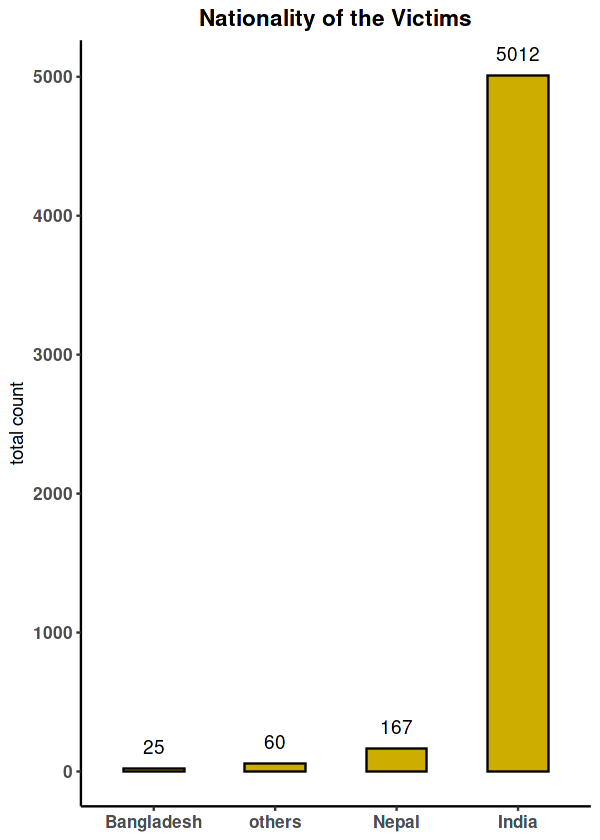

In [37]:
#nationality of the victims
kaggle_plotsize(5,7)
victims_nationality_18 %>%
group_by(nationality) %>%
drop_na() %>%
summarize(victim_count = sum(total_victims_rescued)) %>%
ggplot(aes(x=reorder(nationality,victim_count),y=victim_count)) +
geom_bar(stat="identity",width=0.5,color="black",fill="gold3") +
geom_text(aes(label=victim_count),color="black",vjust=-1) +
labs(title="Nationality of the Victims",y="total count") +
theme_classic()+
theme(plot.title=element_text(face="bold",hjust=0.5),
     axis.title.x=element_blank(),axis.text=element_text(face="bold",size=10))

##### Observations:
1. Most of the victims are Indians.
2. Apart from India, majority of the victims are from neighboring country of Nepal.
3. No data was available for state of Tripura, so it was removed.

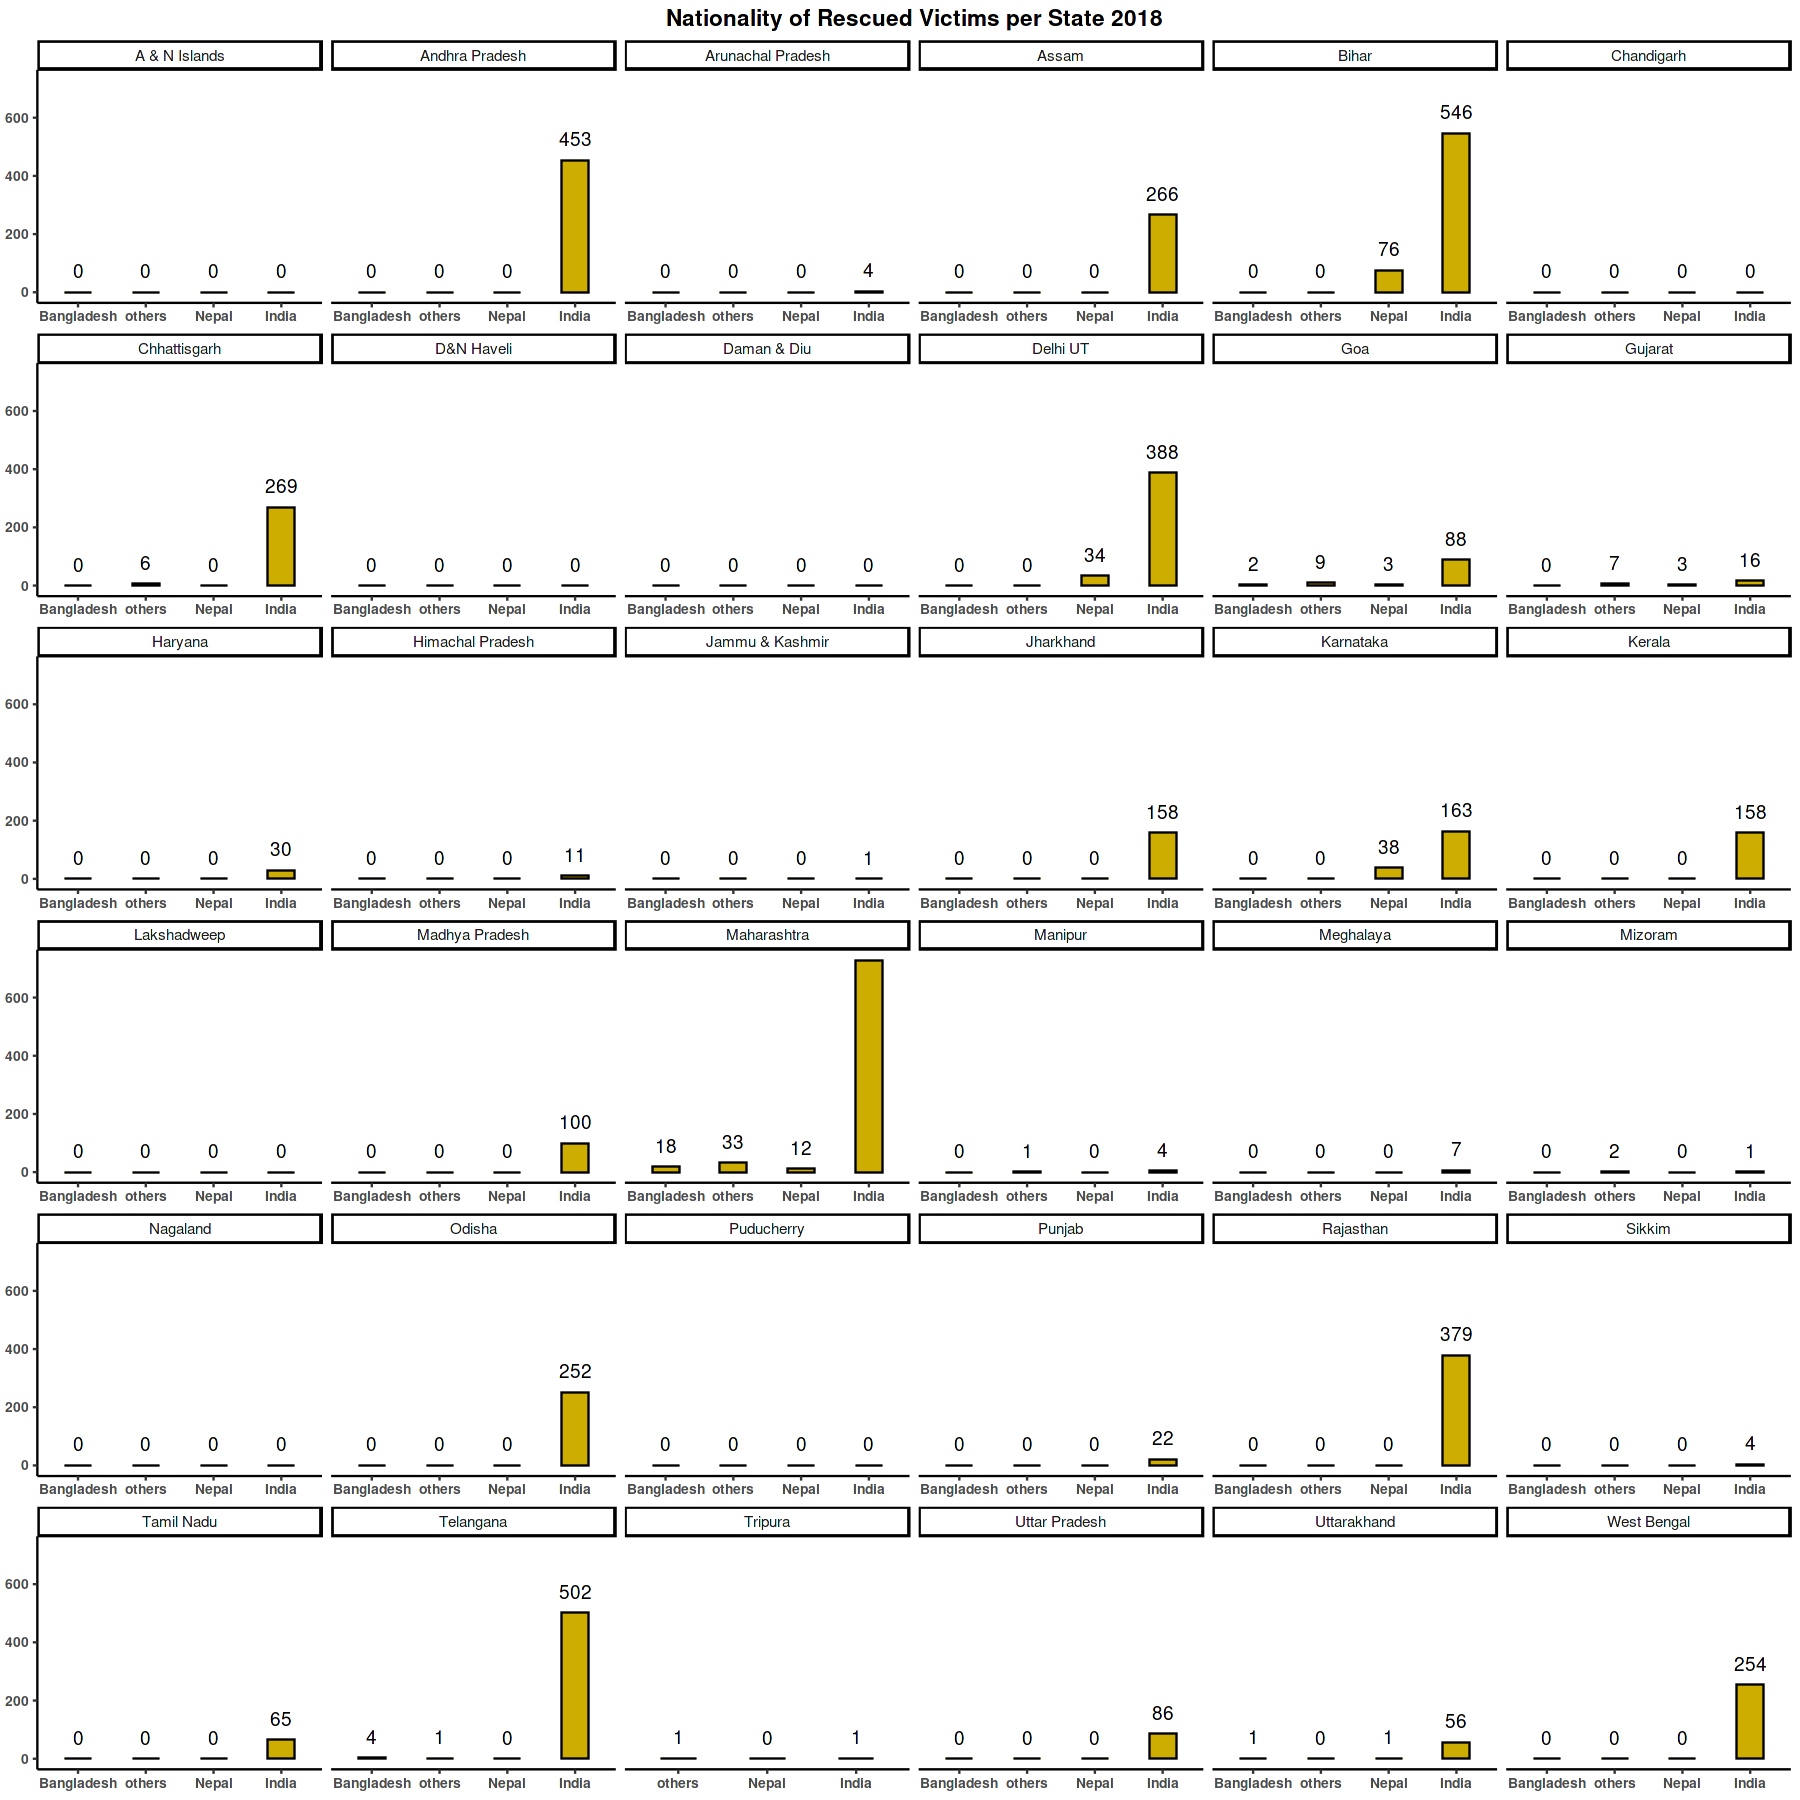

In [38]:
#number of victims rescued along with their nationality per state
kaggle_plotsize(15,15)
victims_nationality_18 %>%
drop_na() %>%
ggplot(aes(x=reorder(nationality,total_victims_rescued),y=total_victims_rescued)) +
geom_bar(stat="identity",color="black",fill="gold3",width=0.4)+
geom_text(aes(label=total_victims_rescued),color="black",vjust=-1)+
theme_classic() +
labs(title="Nationality of Rescued Victims per State 2018") +
theme(axis.title=element_blank(),plot.title=element_text(face="bold",hjust=0.5),
     axis.text=element_text(face="bold",size=8))+
facet_wrap(~states_ut,scales="free_x")

##### Observation:
The states of **Bihar**, **Karnataka** and **Maharashtra** & Union Territory of **Delhi** record higher number of foreign nationals trafficked into India.

In [39]:
#head(purpose_18)